In [1]:
## load the library

from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ggplot
from ggplot import *
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from mpl_toolkits import basemap
from pysal.esda.mapclassify import Natural_Breaks as nb
from descartes import PolygonPatch
import fiona
from itertools import chain
from lxml import etree
import matplotlib.cm as cm
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *
from dateutil.parser import parse
import random
import seaborn as sns
get_ipython().magic('matplotlib inline')



In [2]:
#Read the files

# STATION_DATA
station_data = pd.read_csv('data/station_data_new.csv')

# STATUS_DATA
status_data = pd.read_csv('data/status_data_new.csv')
status_data.columns = ['Index', 'station_id', 'bikes_free', 'docks_free', 'time']

# TRIP_DATA
trip_data = pd.read_csv('data/trip_data_new.csv')
trip_data.columns = ['Date', 'trip_id', 'trip_time', 'start_dt', 'start_station',
       'start_id', 'end_dt', 'end_station', 'end_id', 'bike_num', 'user_type',
       'start_city', 'end_city', 'new']

# WEATHER_DATA
weather_data = pd.read_csv('data/weather_data_new.csv')


In [3]:
weather_data.head()

,date,max_temp,mean_temp,min_temp,max_dp,mean_dp,min_dp,max_hum,mean_hum,min_hum,...,min_vis,max_wind,mean_wind,max_gust,rain_inches,cloud_cover,wind_dir_degrees,ZIP,season,city
0,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,25.0,13.0,29.0,0.0,4.0,284.0,94107,Autumn,San Francisco
1,2013-09-01,81.0,70.0,61.0,62.0,58.0,54.0,80.0,67.0,47.0,...,10.0,14.0,4.0,16.0,0.0,1.0,354.0,94041,Autumn,Mountain View
2,2013-09-01,80.0,71.0,62.0,62.0,58.0,55.0,84.0,65.0,45.0,...,10.0,21.0,7.0,23.0,0.0,1.0,354.0,94301,Autumn,Palo Alto
3,2013-09-01,81.0,72.0,62.0,61.0,57.0,51.0,84.0,62.0,39.0,...,10.0,20.0,7.0,24.0,0.0,2.0,308.0,95113,Autumn,San Jose
4,2013-09-01,80.0,71.0,62.0,61.0,57.0,55.0,82.0,72.0,42.0,...,10.0,13.0,5.0,17.0,0.0,3.0,294.0,94063,Autumn,Redwood City


In [4]:
import datetime

In [5]:
weather_data["date"]

0       2013-09-01
1       2013-09-01
2       2013-09-01
3       2013-09-01
4       2013-09-01
5       2013-09-02
6       2013-09-02
7       2013-09-02
8       2013-09-02
9       2013-09-02
10      2013-09-03
11      2013-09-03
12      2013-09-03
13      2013-09-03
14      2013-09-03
15      2013-09-04
16      2013-09-04
17      2013-09-04
18      2013-09-04
19      2013-09-04
20      2013-09-05
21      2013-09-05
22      2013-09-05
23      2013-09-05
24      2013-09-05
25      2013-09-06
26      2013-09-06
27      2013-09-06
28      2013-09-06
29      2013-09-06
           ...    
3620    2015-08-26
3621    2015-08-26
3622    2015-08-26
3623    2015-08-26
3624    2015-08-26
3625    2015-08-27
3626    2015-08-27
3627    2015-08-27
3628    2015-08-27
3629    2015-08-27
3630    2015-08-28
3631    2015-08-28
3632    2015-08-28
3633    2015-08-28
3634    2015-08-28
3635    2015-08-29
3636    2015-08-29
3637    2015-08-29
3638    2015-08-29
3639    2015-08-29
3640    2015-08-30
3641    2015

In [7]:
from dateutil import parser

In [9]:
#parser.parse(weather_data["date"]).strftime("%a")

weather_data['date'] = pd.to_datetime(weather_data['date'])

In [11]:
#weather_data['date']
weather_data['day_of_week'] = weather_data['date'].dt.dayofweek

In [12]:
weather_data.head()

,date,max_temp,mean_temp,min_temp,max_dp,mean_dp,min_dp,max_hum,mean_hum,min_hum,...,max_wind,mean_wind,max_gust,rain_inches,cloud_cover,wind_dir_degrees,ZIP,season,city,day_of_week
0,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,25.0,13.0,29.0,0.0,4.0,284.0,94107,Autumn,San Francisco,6
1,2013-09-01,81.0,70.0,61.0,62.0,58.0,54.0,80.0,67.0,47.0,...,14.0,4.0,16.0,0.0,1.0,354.0,94041,Autumn,Mountain View,6
2,2013-09-01,80.0,71.0,62.0,62.0,58.0,55.0,84.0,65.0,45.0,...,21.0,7.0,23.0,0.0,1.0,354.0,94301,Autumn,Palo Alto,6
3,2013-09-01,81.0,72.0,62.0,61.0,57.0,51.0,84.0,62.0,39.0,...,20.0,7.0,24.0,0.0,2.0,308.0,95113,Autumn,San Jose,6
4,2013-09-01,80.0,71.0,62.0,61.0,57.0,55.0,82.0,72.0,42.0,...,13.0,5.0,17.0,0.0,3.0,294.0,94063,Autumn,Redwood City,6


In [13]:
weather_data['day_of_week'] = weather_data['date'].dt.weekday_name

In [14]:
weather_data.head()

,date,max_temp,mean_temp,min_temp,max_dp,mean_dp,min_dp,max_hum,mean_hum,min_hum,...,max_wind,mean_wind,max_gust,rain_inches,cloud_cover,wind_dir_degrees,ZIP,season,city,day_of_week
0,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,25.0,13.0,29.0,0.0,4.0,284.0,94107,Autumn,San Francisco,Sunday
1,2013-09-01,81.0,70.0,61.0,62.0,58.0,54.0,80.0,67.0,47.0,...,14.0,4.0,16.0,0.0,1.0,354.0,94041,Autumn,Mountain View,Sunday
2,2013-09-01,80.0,71.0,62.0,62.0,58.0,55.0,84.0,65.0,45.0,...,21.0,7.0,23.0,0.0,1.0,354.0,94301,Autumn,Palo Alto,Sunday
3,2013-09-01,81.0,72.0,62.0,61.0,57.0,51.0,84.0,62.0,39.0,...,20.0,7.0,24.0,0.0,2.0,308.0,95113,Autumn,San Jose,Sunday
4,2013-09-01,80.0,71.0,62.0,61.0,57.0,55.0,82.0,72.0,42.0,...,13.0,5.0,17.0,0.0,3.0,294.0,94063,Autumn,Redwood City,Sunday


In [15]:
weather_data.groupby("day_of_week").describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning:

Invalid value encountered in percentile



ZIP  cloud_cover      max_dp    max_gust  \
day_of_week                                                            
Friday      count    520.000000   520.000000  509.000000  400.000000   
            mean   94325.000000     2.826923   53.330059   21.945000   
            std      404.949570     2.369696    6.613716    7.419204   
            min    94041.000000     0.000000   25.000000    7.000000   
            25%    94063.000000     1.000000         NaN         NaN   
            50%    94107.000000     2.000000         NaN         NaN   
            75%    94301.000000     5.000000         NaN         NaN   
            max    95113.000000     8.000000   66.000000   86.000000   
Monday      count    525.000000   525.000000  518.000000  397.000000   
            mean   94325.000000     2.777143   52.913127   22.088161   
            std      404.945854     2.180292    7.298431    8.091633   
            min    94041.000000     0.000000   23.000000    9.000000   
            25%    94063.000000     1.000000         NaN         NaN   
            50%    94107.000000     3.000000         NaN         NaN   
            75%    94301.000000     4.000000         NaN         NaN   
            max    95113.000000     8.000000   68.000000  114.000000   
Saturday    count    520.000000   519.000000  512.000000  393.000000   
            mean   94325.000000     2.772640   53.621094   22.027990   
            std      404.949570     2.185054    6.431103    8.815671   
            min    94041.000000     0.000000   28.000000    8.000000   
            25%    94063.000000          NaN         NaN         NaN   
            50%    94107.000000          NaN         NaN         NaN   
            75%    94301.000000          NaN         NaN         NaN   
            max    95113.000000     8.000000   68.000000  114.000000   
Sunday      count    525.000000   525.000000  518.000000  397.000000   
            mean   94325.000000     2.771429   53.233591   22.040302   
            std      404.945854     2.145727    6.655481   10.027154   
            min    94041.000000     0.000000   29.000000    7.000000   
            25%    94063.000000     1.000000         NaN         NaN   
            50%    94107.000000     3.000000         NaN         NaN   
            75%    94301.000000     4.000000         NaN         NaN   
            max    95113.000000     8.000000   68.000000  114.000000   
Thursday    count    520.000000   520.000000  513.000000  374.000000   
            mean   94325.000000     2.819231   53.101365   22.778075   
            std      404.949570     2.420611    7.087171   12.721663   
            min    94041.000000     0.000000   25.000000    6.000000   
            25%    94063.000000     0.000000         NaN         NaN   
            50%    94107.000000     3.000000         NaN         NaN   
            75%    94301.000000     5.000000         NaN         NaN   
            max    95113.000000     8.000000   66.000000  114.000000   
Tuesday     count    520.000000   520.000000  514.000000  393.000000   
            mean   94325.000000     2.830769   52.747082   22.409669   
            std      404.949570     2.282170    6.595988    8.138007   
            min    94041.000000     0.000000   29.000000    6.000000   
            25%    94063.000000     1.000000         NaN         NaN   
            50%    94107.000000     2.500000         NaN         NaN   
            75%    94301.000000     5.000000         NaN         NaN   
            max    95113.000000     8.000000   68.000000  114.000000   
Wednesday   count    520.000000   520.000000  512.000000  398.000000   
            mean   94325.000000     2.703846   52.851562   22.811558   
            std      404.949570     2.363170    7.376739   11.290181   
            min    94041.000000     0.000000   20.000000    6.000000   
            25%    94063.000000     1.000000         NaN         NaN   
            50%    94107.000000     2.000000         NaN         NaN

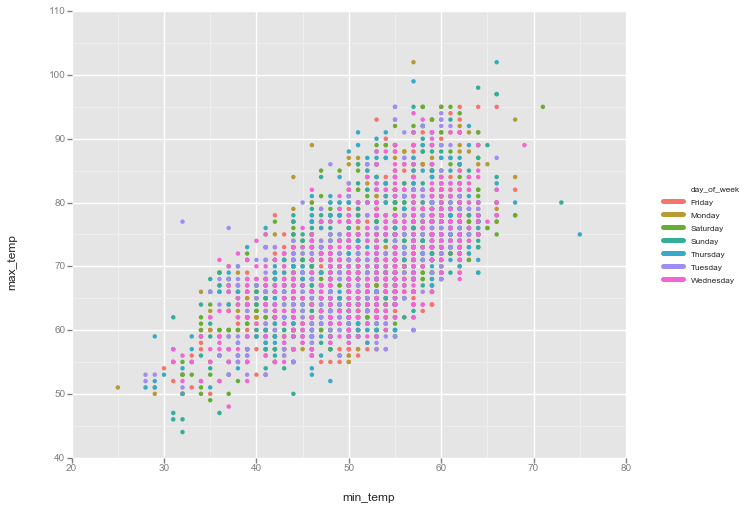

<ggplot: (-9223372036552694377)>

In [17]:
ggplot(weather_data, aes(x="min_temp", y="max_temp", color = "day_of_week"))+\
    geom_point()

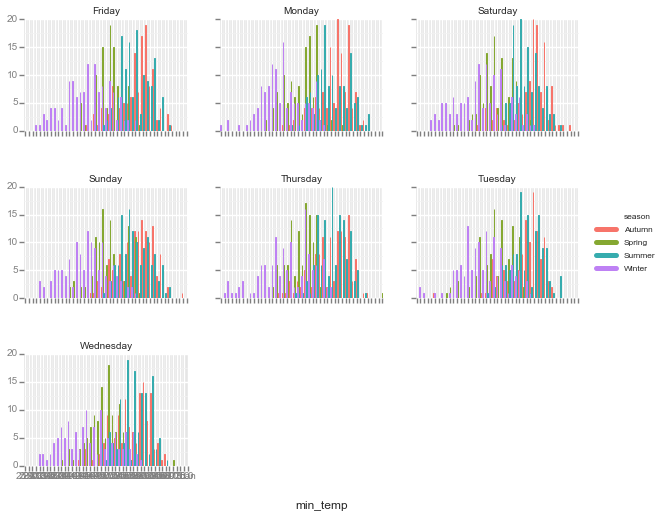

<ggplot: (312288064)>

In [23]:
ggplot(weather_data, aes(x="min_temp", fill = "season"))+\
    geom_bar() +\
    facet_wrap("day_of_week")

In [25]:
trip_data.tail()

,Date,trip_id,trip_time,start_dt,start_station,start_id,end_dt,end_station,end_id,bike_num,user_type,start_city,end_city,new
667852,2015-08-31,912155,755,2015-08-31 09:11:00,Golden Gate at Polk,59,8/31/2015 9:23,San Francisco Caltrain 2 (330 Townsend),69,437,Subscriber,San Francisco,San Francisco,2015-08-31
667853,2015-08-31,912154,586,2015-08-31 09:10:00,Steuart at Market,74,8/31/2015 9:20,2nd at Townsend,61,526,Subscriber,San Francisco,San Francisco,2015-08-31
667854,2015-08-31,912153,357,2015-08-31 09:10:00,Steuart at Market,74,8/31/2015 9:16,Embarcadero at Sansome,60,434,Subscriber,San Francisco,San Francisco,2015-08-31
667855,2015-08-31,912162,705,2015-08-31 09:15:00,San Jose Diridon Caltrain Station,2,8/31/2015 9:27,SJSU 4th at San Carlos,12,50,Subscriber,San Jose,San Jose,2015-08-31
667856,2015-08-31,912926,280,2015-08-31 17:22:00,Commercial at Montgomery,45,8/31/2015 17:27,Temporary Transbay Terminal (Howard at Beale),55,636,Subscriber,San Francisco,San Francisco,2015-08-31


In [28]:
trip_data['day_of_week'] = trip_data['new'].dt.weekday_name

AttributeError: Can only use .dt accessor with datetimelike values